# **Data Visualization**
In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.

## Objectives
After completing this lab, you will be able to:
-   Visualize the distribution of data.
-   Visualize the relationship between two features.
-   Visualize composition and comparison of data.

## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('survey_data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


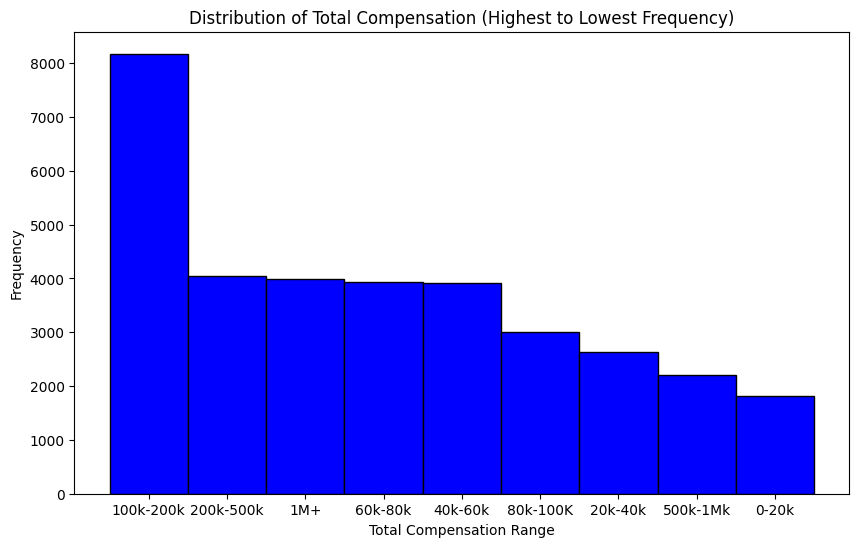

In [11]:
## Write your code here
QUERY = """
SELECT 
    CASE 
         WHEN CompTotal < 20000 THEN '0-20k'
         WHEN CompTotal >= 20000 AND CompTotal < 40000 THEN '20k-40k'
         WHEN CompTotal >= 40000 AND CompTotal < 60000 THEN '40k-60k'
         WHEN CompTotal >= 60000 AND CompTotal < 80000 THEN '60k-80k'
         WHEN CompTotal >= 80000 AND CompTotal < 100000 THEN '80k-100K'
         WHEN CompTotal >= 100000 AND CompTotal < 200000 THEN '100k-200k'
         WHEN CompTotal >= 200000 AND CompTotal < 500000 THEN '200k-500k'
         WHEN CompTotal >= 500000 AND CompTotal < 1000000 THEN '500k-1Mk'
         ELSE '1M+'
    END AS CompTotalRange,
    COUNT(*) AS Frequency
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY CompTotalRange
ORDER BY Frequency;
"""

# Load the SQL results into a pandas DataFrame
df_CompTotal = pd.read_sql_query(QUERY, conn)

# Assuming df_CompTotal is already loaded using your SQL query:
# df_CompTotal = pd.read_sql_query(QUERY, conn)

# Sort the DataFrame by Frequency in descending order
df_sorted = df_CompTotal.sort_values("Frequency", ascending=False)

# Plot the bar chart (histogram) with fatter bars and descending order on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['CompTotalRange'], df_sorted['Frequency'], 
        color='blue', edgecolor='black', width=1.0)  # Increase width for fatter bars
plt.xlabel('Total Compensation Range')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation (Highest to Lowest Frequency)')
plt.show()

**Box Plots**

Plot a box plot of Age.


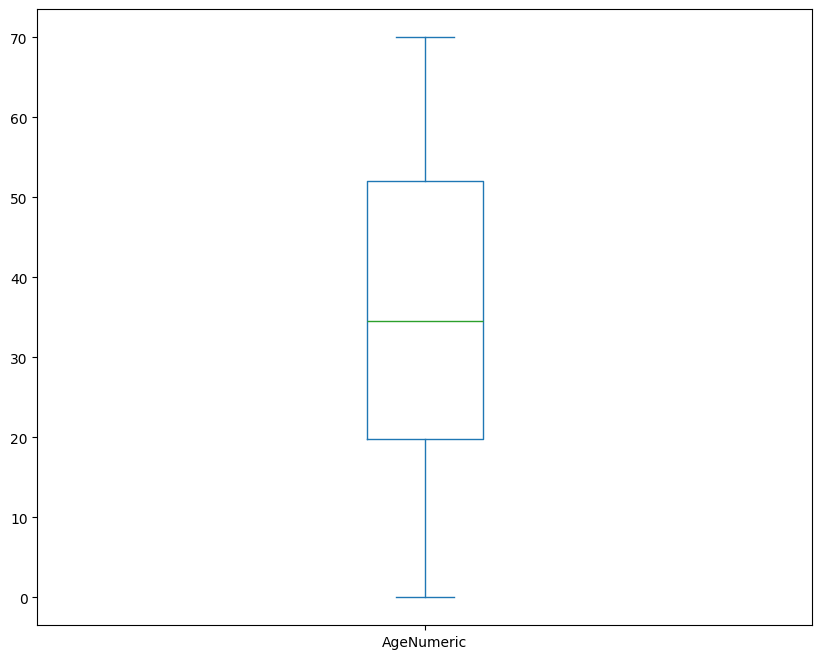

In [12]:
## Write your code here
QUERY2 = """
SELECT
    CASE
        WHEN Age = 'Under 18 years old' THEN 16
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 29.5
        WHEN Age = '35-44 years old' THEN 39.5
        WHEN Age = '45-54 years old' THEN 49.5
        WHEN Age = '55-64 years old' THEN 59.5
        WHEN Age = '65 years or older' THEN 70
        ELSE 0
    END AS AgeNumeric
FROM main
WHERE Age IS NOT NULL
GROUP BY AgeNumeric
ORDER BY AgeNumeric
"""
df = pd.read_sql_query(QUERY2, conn)
df.head()
df.plot(kind='box', figsize=(10, 8))

plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


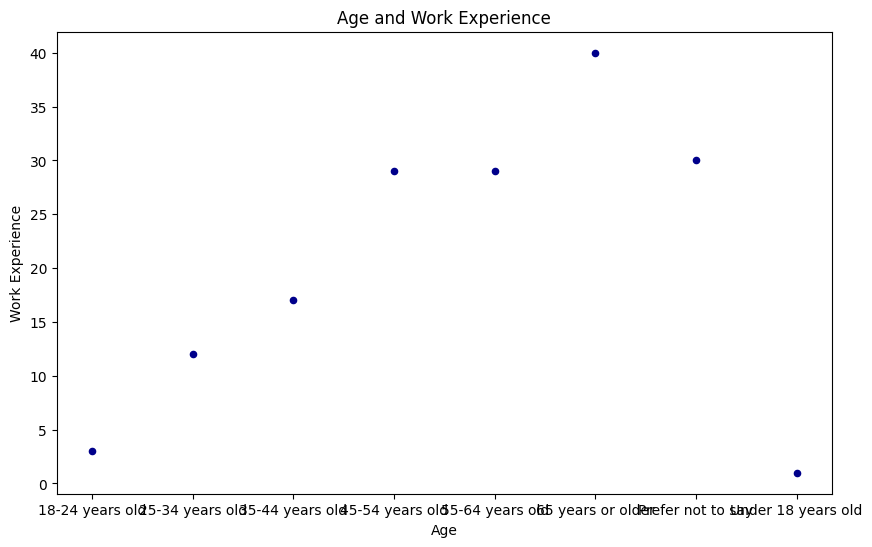

In [13]:
## Write your code here
Query3 = """
SELECT Age, WorkExp
FROM main
WHERE AGE IS NOT NULL AND WorkExp IS NOT NULL
GROUP BY 1
ORDER BY 1
"""
Age_WWH = pd.read_sql_query(Query3, conn)
# Create scatter plot
Age_WWH.plot(kind='scatter', x='Age', y='WorkExp', figsize=(10, 6), color='darkblue')

plt.title('Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')

plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


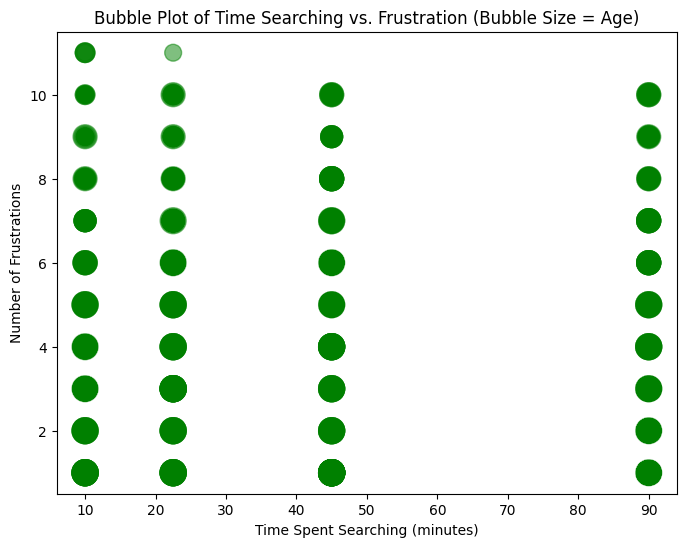

In [14]:
## Write your code here
QUERY = """
SELECT 
    CASE 
        WHEN Age = 'Under 18 years old' THEN 16
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 29.5
        WHEN Age = '35-44 years old' THEN 39.5
        WHEN Age = '45-54 years old' THEN 49.5
        WHEN Age = '55-64 years old' THEN 59.5
        WHEN Age = '65 years or older' THEN 70
        ELSE 0
    END AS AgeNumeric,
    TimeSearching,
    Frustration
FROM main
WHERE Age IS NOT NULL 
AND TimeSearching IS NOT NULL 
AND Frustration IS NOT NULL;
"""
# Execute the SQL query and load results into Pandas
df = pd.read_sql_query(QUERY, conn)

# Map TimeSearching to numerical values (in minutes)
time_searching_map = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "More than 120 minutes a day": 150
}
df["TimeSearchingNumeric"] = df["TimeSearching"].map(time_searching_map)

# Count the number of frustrations (assuming they're separated by ";")
df["FrustrationNumeric"] = df["Frustration"].apply(lambda x: len(x.split(";")))

# Plot bubble chart
plt.figure(figsize=(8, 6))
plt.scatter(df["TimeSearchingNumeric"], df["FrustrationNumeric"], 
            s=df["AgeNumeric"] * 5,  # Bubble size
            alpha=0.5, color="green")

# Labels and title
plt.xlabel("Time Spent Searching (minutes)")
plt.ylabel("Number of Frustrations")
plt.title("Bubble Plot of Time Searching vs. Frustration (Bubble Size = Age)")

# Show plot
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


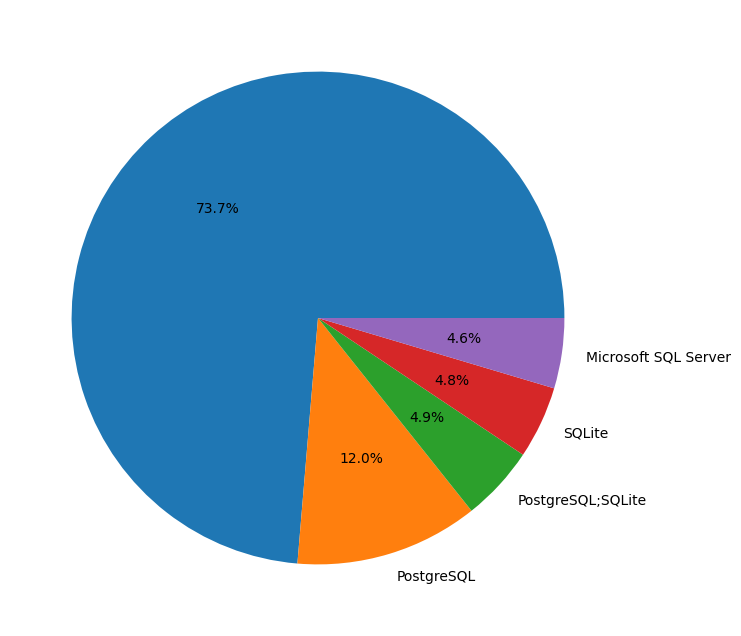

In [15]:
## Write your code here
QUERY = """
SELECT *, COUNT(*) AS count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)

data = df['count']
labels = df['DatabaseWantToWorkWith']

plt.rcParams['figure.figsize'] = [8, 8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


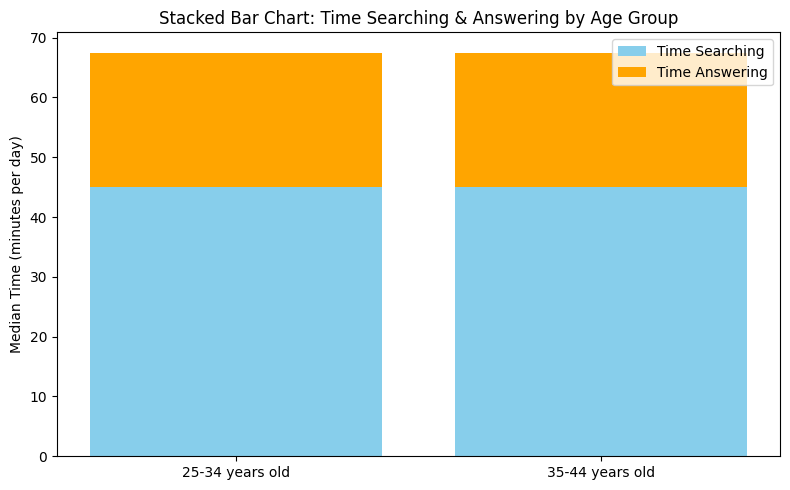

In [16]:
## Write your code here
query = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IN ('25-34 years old', '35-44 years old')
  AND TimeSearching IS NOT NULL
  AND TimeAnswering IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 2: Define mapping (in minutes per day)
time_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "More than 4 hours a day": 270
}

# Step 3: Map to numeric values (no conversion to weekly time)
df['TimeSearching_mins'] = df['TimeSearching'].map(time_mapping)
df['TimeAnswering_mins'] = df['TimeAnswering'].map(time_mapping)

# Step 4: Drop rows with missing mapped values
df = df.dropna(subset=['TimeSearching_mins', 'TimeAnswering_mins'])

# Step 5: Group by Age and calculate medians
grouped_medians = df.groupby('Age')[['TimeSearching_mins', 'TimeAnswering_mins']].median().reset_index()

# Step 6: Stacked bar plot
plt.figure(figsize=(8, 5))
plt.bar(grouped_medians['Age'], grouped_medians['TimeSearching_mins'], label='Time Searching', color='skyblue')
plt.bar(grouped_medians['Age'], grouped_medians['TimeAnswering_mins'],
        bottom=grouped_medians['TimeSearching_mins'], label='Time Answering', color='orange')

plt.ylabel('Median Time (minutes per day)')
plt.title('Stacked Bar Chart: Time Searching & Answering by Age Group')
plt.legend()
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


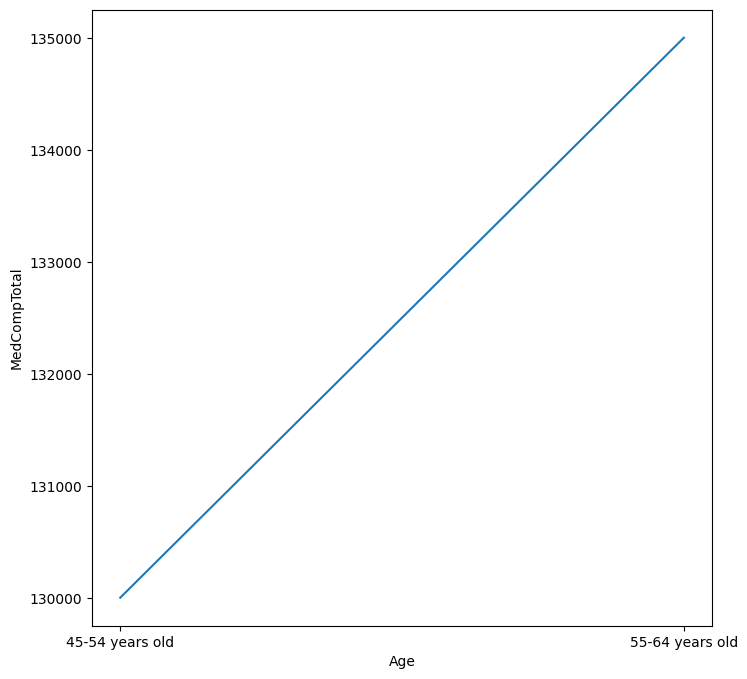

In [18]:
## Write your code here
import seaborn as sns

QUERY = """
SELECT CompTotal, Age
FROM main
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY, conn)

medians = df.groupby('Age')['CompTotal'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedCompTotal'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedCompTotal')

plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


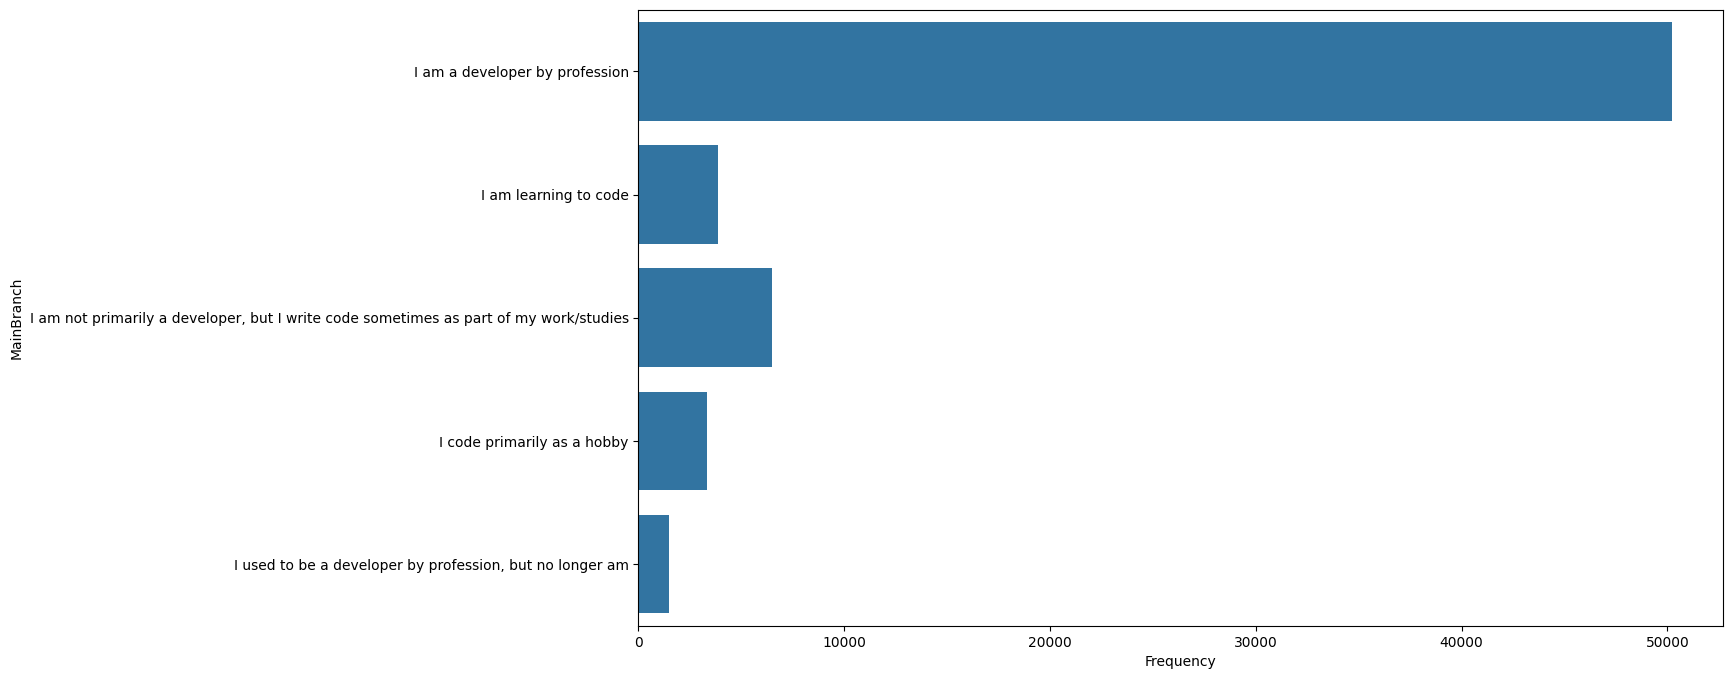

In [19]:
## Write your code here
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM main
GROUP BY MainBranch
"""
df = pd.read_sql_query(QUERY, conn)

plt.rcParams['figure.figsize'] = [14, 8]

sns.barplot(data = df, y = 'MainBranch', x = 'Frequency', orient = 'h')

plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [20]:
conn.close()

Copyright © IBM Corporation. All rights reserved.
